Impulse Response

x(t) -> h(t) -> y(t)


I(t) conv h(t) = h(t)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


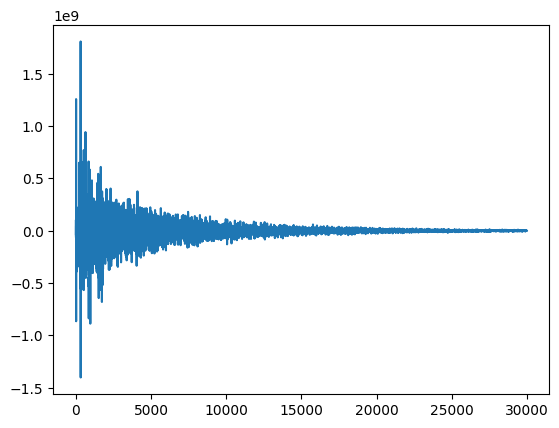

In [3]:
(Fs, raw) = wavfile.read("Adele.wav")
time_dom = np.array(raw)

(_,raw) = wavfile.read("Church Schellingwoude.wav")
IR = np.array(raw).astype("float64")[:30000]

plt.plot(IR)
plt.show()

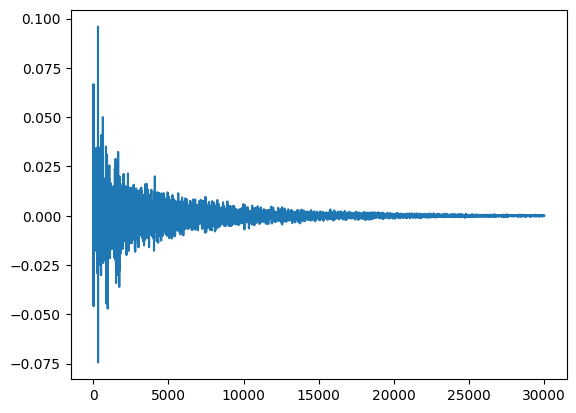

In [4]:
IR /= np.sum(np.abs(IR))
IR *= 50 #IR *= 8 #IR *= 1
plt.plot(IR)
plt.show()

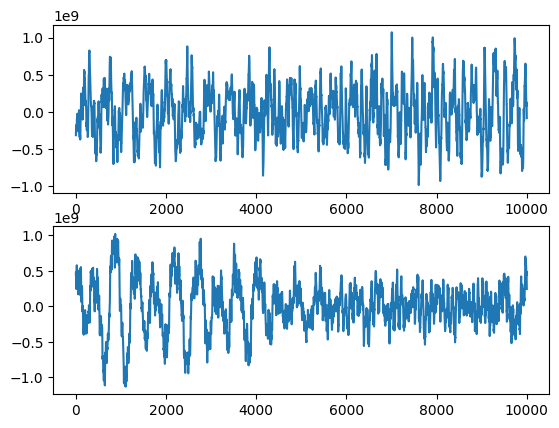

In [5]:
out = np.convolve (time_dom, IR, mode = "same")
plt.subplot(211)
plt.plot(out[10000:20000])
plt.subplot(212)
plt.plot(time_dom[10000:20000])
plt.show()

In [6]:
#wavfile.write("out.wav", Fs, out.astype("int32"))

Task 2

In [30]:
(_,raw) = wavfile.read("Factory.wav")
IR1 = np.array(raw).astype("float64")[:30000]
IR1 /= np.sum(np.abs(IR1))
IR1 *= 8
IR1 = np.ravel(IR1)

(_,raw) = wavfile.read("Glass.wav") 
IR2 = np.array(raw).astype("float64")[:30000]
IR2 /= np.sum(np.abs(IR2))
IR2 *= 8
IR2 = np.ravel(IR2)

In [31]:
out2 = np.convolve(time_dom, IR1, mode="same")
out3 = np.convolve(time_dom, IR2, mode="same")

In [32]:
#wavfile.write("FactoryOut.wav", Fs, out2.astype("int32"))
#wavfile.write("GlassOut.wav", Fs, out3.astype("int32"))

TASK 3

In [36]:
noise = np.random.normal(0, 1, size=500)
noise_scaled = (noise / np.max(np.abs(noise))) * (2**30)
noise_int32 = noise_scaled.astype('int32')
#wavfile.write('noise.wav', 44100, noise_int32)
I = (np.random.normal(0,1,size = 500)*2**30).astype("int32")
#wavfile.write("impulse.wav",44100, I.astype("int32"))

In [33]:
import sounddevice as sd

Fs = 44100
s = 5
IRrec = sd.rec(Fs*s, Fs,channels = 1, dtype="int32")
sd.wait()


In [34]:
wavfile.write("OurIR.wav", Fs, IRrec.astype("int32"))

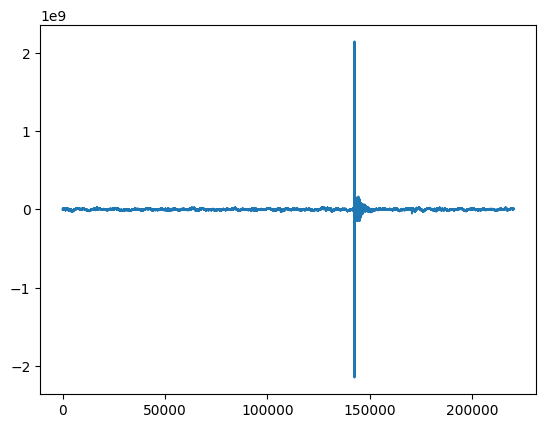

In [40]:
(_, raw) = wavfile.read("OurIR.wav")
RecIR = np.array(raw)
plt.plot(RecIR)
plt.show()
RecIR = RecIR[:5000]

In [43]:
IR_float = RecIR.astype('float64')
IR_norm = IR_float / np.sum(np.abs(IR_float))

In [44]:
out = np.convolve(time_dom, IR_norm, mode='same')
out_scaled = (out / np.max(np.abs(out))) * (2**30)
out_int32 = out_scaled.astype('int32')
wavfile.write('outRecIRcon.wav', 44100, out_int32)

In [45]:
IR_scaled = (IR_norm / np.max(np.abs(IR_norm))) * 0.9 # decrease volume by 10%
out = np.convolve(time_dom, IR_scaled, mode='same')
out_scaled = (out / np.max(np.abs(out))) * (2**30)
out_int32 = out_scaled.astype('int32')
wavfile.write('outRecIRconadj.wav', 44100, out_int32)

see where the peaks and take them as [38500:40000]

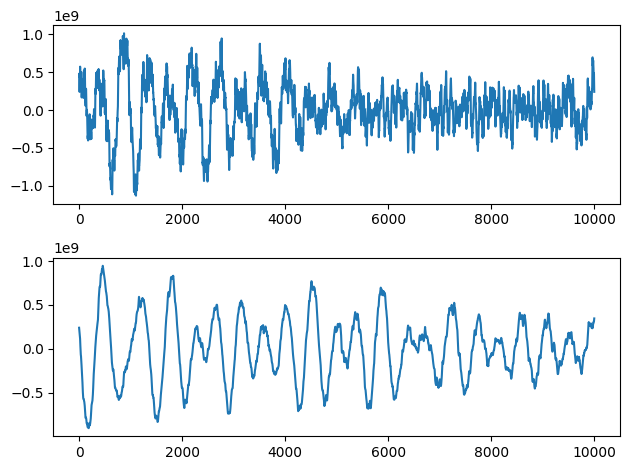

In [41]:
(_, raw) = wavfile.read("OurIR.wav")
IR = np.array(raw)[38500:48000].astype("float64")
IR /= np.sum(np.abs(IR))
IR *=30

out = np.convolve(time_dom, IR, mode ="same")

plt.subplot(211)
plt.plot(time_dom[10000:20000])
plt.subplot(212)
plt.plot(out[10000:20000])
plt.tight_layout()
plt.show()

#wavfile.write("out2.wav",Fs,out.astype("int32"))

<function matplotlib.pyplot.show(close=None, block=None)>

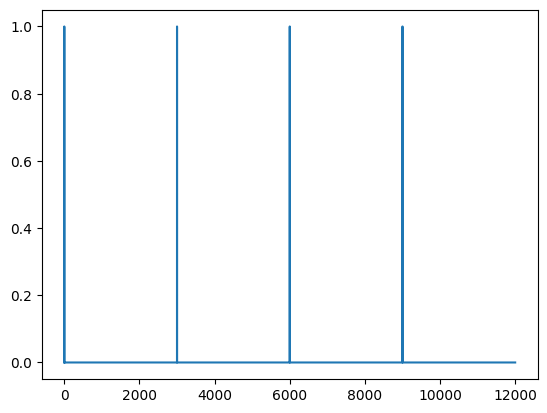

In [39]:
filt = np.zeros(1)
sub_filt = np.zeros(3000)
sub_filt[0] = 1
for i in range (4):
    filt = np.concatenate((filt, sub_filt))

plt.plot(filt)
plt.show

In [13]:
out = np.convolve(time_dom, filt, mode = "same")
#wavfile.write("out3.wav",Fs,out.astype("int32"))

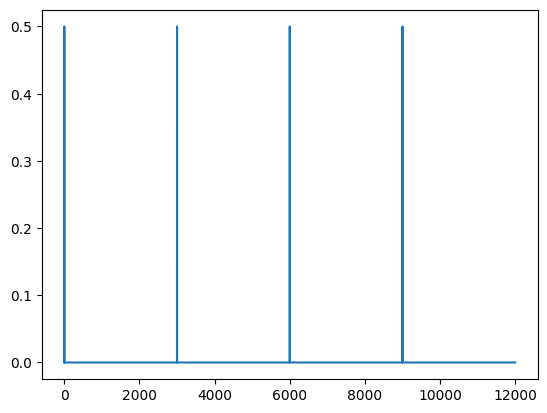

In [14]:
filt /= 2
plt.plot(filt)
plt.show()
#out = np.convolve(time_dom, filt, mode = "same")


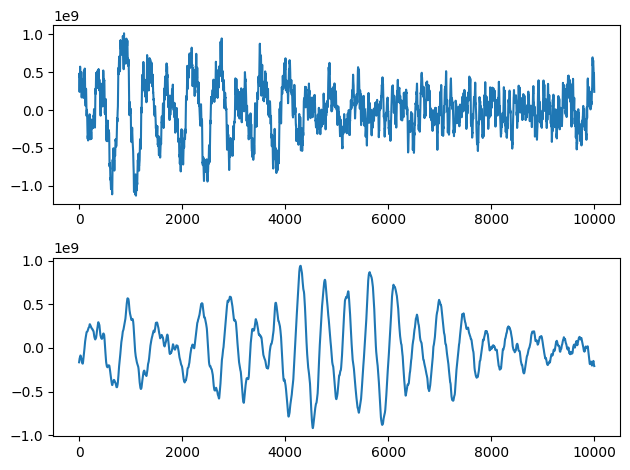

In [42]:
filt = np.zeros(1)
sub_filt = np.zeros(3000)
sub_filt = np.arange(1,0,-0.0003)**4
for i in range(4):
    filt = np.concatenate((filt, sub_filt / (1+i)))

filt /= np.sum(np.abs(filt))
filt *= 20

out = np.convolve(time_dom, filt, mode = "same")
#wavfile.write("out4.wav", Fs, out.astype("int32"))

plt.subplot(211)
plt.plot(time_dom[10000:20000])
plt.subplot(212)
plt.plot(out[10000:20000])
plt.tight_layout()
plt.show()

Task 4

In [46]:
IR = np.zeros(np.random.randint(500, 5000))
IR[0] = 1
while len(IR) < 50000:
    IR = np.concatenate((IR, IR))
IR = IR[:50000]

In [47]:
IR = IR.astype("float64")
IR /= np.sum(np.abs(IR))

In [48]:
Fs = 44100
s = 5
audio_rec = sd.rec(Fs*s, Fs, channels=1, dtype="float64")
sd.wait()

In [49]:
wavfile.write("recorded_audio.wav", Fs, audio_rec)
(_, raw) = wavfile.read("recorded_audio.wav")
audio = np.array(raw, dtype="float64")
audio /= np.max(np.abs(audio))

out = np.convolve(audio, IR, mode="same")

g)The audio has been convolved with the custom impulse response, resulting in a new audio file that has been modified by the impulse response.

In [51]:
wavfile.write("outfour.wav", Fs, out)

In [52]:
IR2 = np.linspace(1, 0, np.random.randint(500, 5000))

In [53]:
IR2 = np.power(IR2, 10)

In [54]:
IR2 *= 20
IR2 = np.concatenate((IR2, IR2))
IR2 *= 10
IR2 = np.concatenate((IR2, IR2))
IR2 *= 5
IR2 = np.concatenate((IR2, IR2))
IR2 *= 2

IR2 /= np.sum(np.abs(IR2))
IR2 = IR2.astype("float64")
out2 = np.convolve(audio, IR2, mode="same")

In [55]:
wavfile.write("outfour2.wav", Fs, out2)

The audio file has been convolved with the new custom impulse response created by the decreasing values array raised to the 10th power. Compared to the previous impulse response, this new impulse response has a different shape and characteristics that can result in a different sound when applied to the audio signal.

The length of the initial array affects the result in that it determines the length of the overall impulse response after concatenation. A longer initial array will result in a longer overall impulse response, which can potentially affect the sound quality and characteristics.

The concatenation affects the result in that it determines how many times the initial array is repeated to create the overall impulse response. The more times it is repeated, the more complex the impulse response can become, potentially resulting in a more interesting sound. However, if it is repeated too many times, it can lead to distortion or other unwanted artifacts. The scalar used to multiply each subsequent concatenation can also affect the overall amplitude and character of the impulse response.